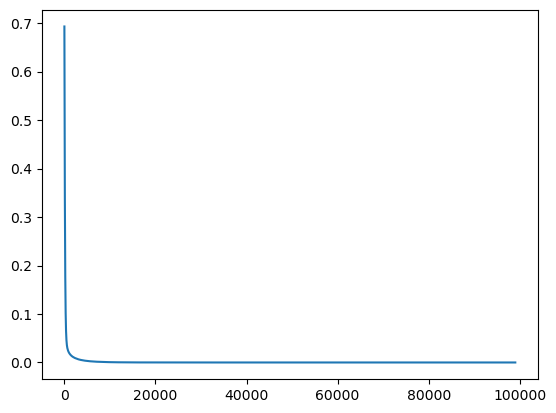

In [1]:
import numpy as np
import matplotlib.pyplot as plt

seeds = np.arange(4)
n_tasks = [1000]
alphas = [0.5,1.0,2.0,4.0]
dims = (1 + np.arange(50))*20

seed = 0
n_task = 1000
alpha = 1.4
dim = 1000

# time evolution
# single run
data = np.load(f'./results/nsl_ortho/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
plt.plot(data['losses'])
#plt.yscale('log')
#plt.xscale('log')

In [110]:
data['losses']

array([6.93147182e-01, 6.47239315e-01, 6.06168830e-01, ...,
       8.86196831e-08, 8.80754633e-08, 8.83697892e-08])

In [2]:
# scale wrt to dim (NSL # params)
seed = 0
n_task = 1000
#alphas = [0.5, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 4.0]
alphas = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
dim = 100

lossess = []

for alpha in alphas:
    print(alpha)
    losses = []
    for dim in dims:
        losses_ = []
        for seed in seeds:
            data = np.load(f'./results/nsl_ortho/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
            losses_.append(data['losses'][-1])
        losses.append(np.median(losses_))
    
    lossess.append(losses)
    
lossess = np.array(lossess)
#plt.plot(dims, losses, marker='o')
#plt.xscale('log')
#plt.yscale('log')

1.0
1.2
1.4
1.6
1.8
2.0


In [3]:
#np.save('./results/nsl_adam_alpha_N', lossess)
#np.save('./results/nsl_signgd_alpha_N', lossess)
np.save('./results/nsl_ortho_signgd_alpha_N', lossess)

In [68]:
import numpy as np

#data_signgd = np.load('./results/nsl_signgd_alpha_N.npy')
#data_adam = np.load('./results/nsl_adam_alpha_N.npy')

data_norm = np.load('./results/nsl_signgd_alpha_N.npy')
data_ortho = np.load('./results/nsl_ortho_signgd_alpha_N.npy')

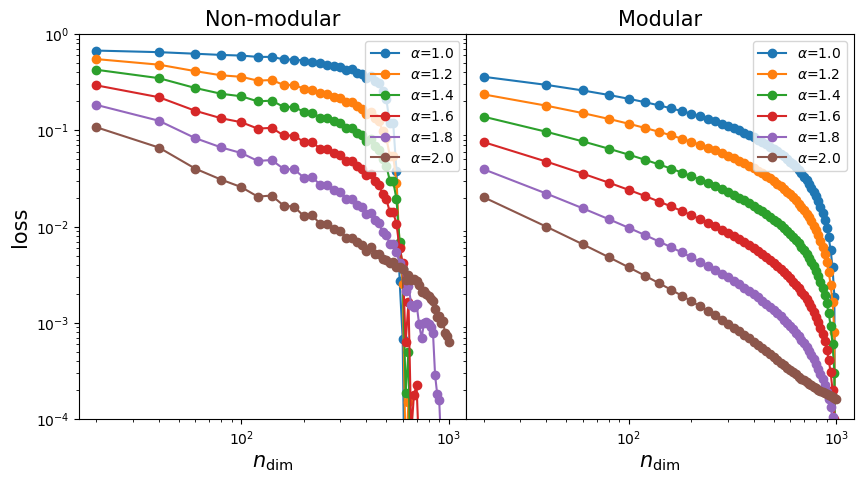

In [69]:


plt.figure(figsize=(10,5))

dims = (1 + np.arange(50))*20
#alphas = [0.5, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
alphas = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]


#alpha_num = 7
alpha_num = 6

for j in range(2):
    plt.subplot(1,2,j+1)

    if j == 0:
        for i in range(alpha_num):
            plt.plot(dims, data_norm[i]+0.0, marker='o')
    if j == 1:
        for i in range(alpha_num):
            plt.plot(dims, data_ortho[i], marker='o')
            
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.0001,1)

    plt.legend([r'$\alpha$='+str(alphas[i]) for i in range(alpha_num)], fontsize=10, loc='upper right')
    #plt.plot([40,40], [0.001,1], color='black', ls='--', alpha=0.5)
    #plt.plot([250,250], [0.001,1], color='black', ls='--', alpha=0.5)
    #plt.text(70,0.003,'fitting', fontsize=15)
    plt.xlabel(r'$n_{\rm dim}$', fontsize=15)
    
    if j == 0:
        plt.ylabel('loss', fontsize=15)
    
    if j == 0:
        plt.title('Non-modular',fontsize=15)
    if j == 1:
        plt.title('Modular',fontsize=15)
        plt.yticks([])
        
plt.subplots_adjust(wspace=0, hspace=0.0)

plt.savefig('./plot/loss_scaling_modular_N.pdf', bbox_inches='tight')

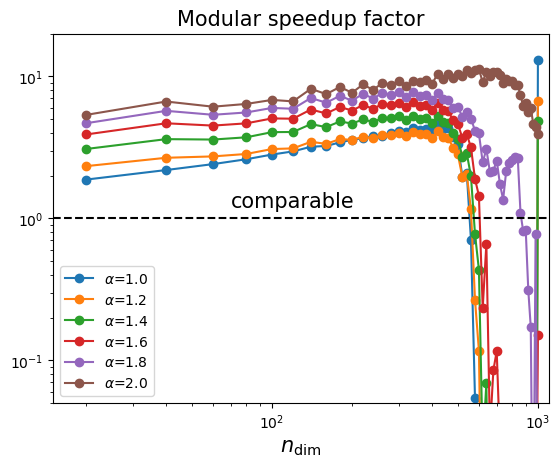

In [70]:

for i in range(alpha_num):
    plt.plot(dims, (data_norm[i])/(data_ortho[i]), marker='o')


plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.0001,1)

plt.legend([r'$\alpha$='+str(alphas[i]) for i in range(alpha_num)], fontsize=10, loc='lower left')
#plt.plot([40,40], [0.001,1], color='black', ls='--', alpha=0.5)
#plt.plot([250,250], [0.001,1], color='black', ls='--', alpha=0.5)
#plt.text(70,0.003,'fitting', fontsize=15)
plt.xlabel(r'$n_{\rm dim}$', fontsize=15)

plt.title('Modular speedup factor',fontsize=15)

#plt.ylabel('modular loss/non-modu')

plt.subplots_adjust(wspace=0, hspace=0.0)
plt.ylim(0.05,20.0)
plt.xlim(15,1100)

plt.plot([15,1100], [1.0, 1.0], ls='--', color='black')
plt.text(70, 1.2, 'comparable', fontsize=15)
plt.savefig('./plot/modular_speedup_N.pdf', bbox_inches='tight')

Text(0, 0.5, '$\\alpha_N$')

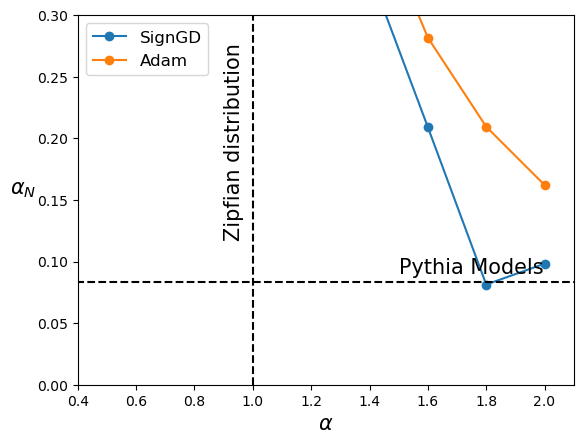

In [206]:
plt.plot(np.array(alphas[:7]), alpha_n_signgd[:7], marker='o')
plt.plot(np.array(alphas[:7]), alpha_n_adam[:7], marker='o')

plt.legend(['SignGD', 'Adam'], loc='upper left', fontsize=12)

plt.plot([0.0,2.1],[0.083,0.083], ls='--', color='black')
plt.text(1.5,0.09,'Pythia Models', fontsize=15)

plt.plot([1.0,1.0],[0.00,0.3], ls='--', color='black')
plt.text(0.9,0.12,'Zipfian distribution', fontsize=15, rotation=90)
plt.xlim(0.4,2.1)
plt.ylim(0.0,0.3)

plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel(r'$\alpha_N$', fontsize=15, rotation=0, labelpad=10)
#plt.savefig('./plot/scale_exp_N.pdf', bbox_inches='tight')

(0.003, 2)

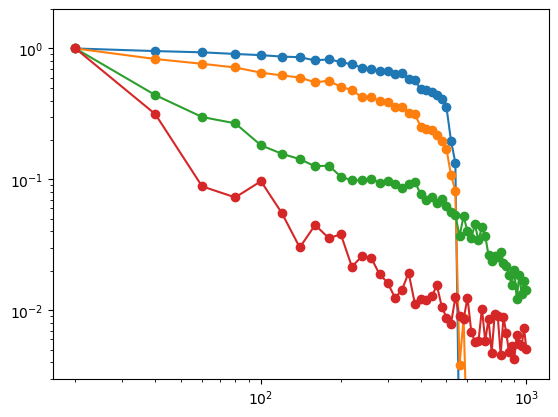

In [96]:
for i in range(4):
    plt.plot(dims, data[i]/data[i,0], marker='o')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.003,2)

In [51]:
# emergent abilities

#for dim in dims:
seed = 0
n_task = 1000
alpha = 1.0

skill_id = [0,5,10,100,999]
skills = []

for dim in dims:
    print(dim)

    data = np.load(f'./results/nsl/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
    skills.append(data['skill'][-1,:][skill_id])
    
skills = np.array(skills)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000


Text(700, 0.45, 'random')

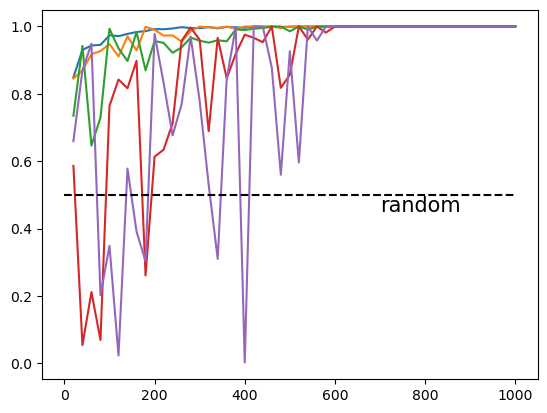

In [52]:
for i in range(len(skill_id)):
    plt.plot(dims, skills[:,i])
    
plt.plot([0,1000], [0.5,0.5], ls='--', color='black')
plt.text(700,0.45,'random', fontsize=15)

Text(0, 0.5, 'loss')

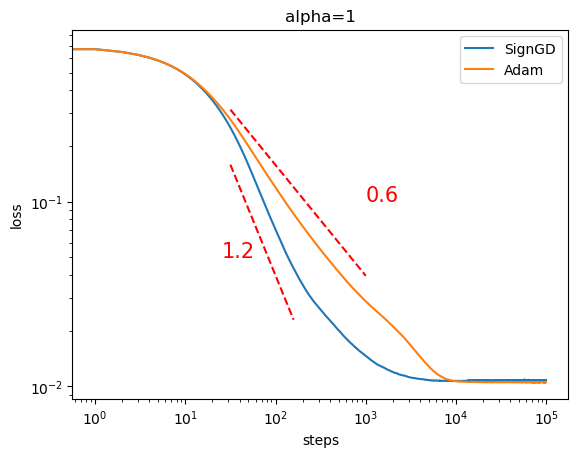

In [57]:
import numpy as np
import matplotlib.pyplot as plt

seeds = np.arange(4)
n_tasks = [1000]
alphas = [0.5,1.0,2.0,4.0]

seed = 0
n_task = 1000
alpha = 2.0
dim = 100

# time evolution
# single run
data = np.load(f'./results/nsl_signgd/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
plt.plot(data['losses'])

data2 = np.load(f'./results/nsl/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
plt.plot(data2['losses'])
plt.yscale('log')
plt.xscale('log')

x = 10 ** np.linspace(1.5,2.2)

plt.plot(x, 10*x**(-1.2), ls='--', color='red')

x = 10 ** np.linspace(1.5,3)

plt.plot(x, 2.5*x**(-0.6), ls='--', color='red')

plt.legend(['SignGD', 'Adam'])
plt.title('alpha=1')

plt.text(25,0.05,'1.2', color='red', fontsize=15)
plt.text(1000,0.1,'0.6', color='red', fontsize=15)

plt.xlabel('steps')
plt.ylabel('loss')

In [ ]:
# comparing SignGD and Adam for three different alpha

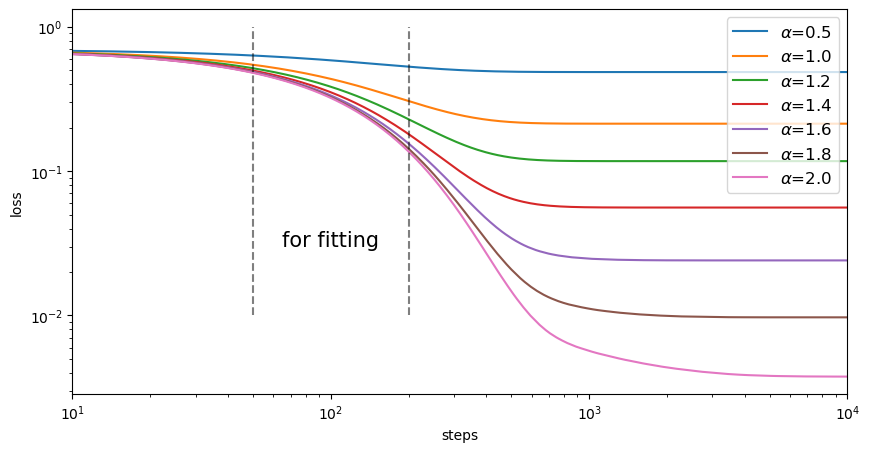

In [10]:
import numpy as np
import matplotlib.pyplot as plt

seeds = np.arange(4)
n_tasks = [1000]
alphas = [0.5,1.0,1.2,1.4,1.6,1.8,2.0]

seed = 0
n_task = 1000
alpha = 2.0
dim = 100

plt.figure(figsize=(10,5))

# time evolution
# single run

data_r = []

for alpha in alphas:
    data = np.load(f'./results/nsl_ortho/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
    plt.plot(data['losses'])
    data_r.append(data['losses'])

plt.xscale('log')
plt.yscale('log')

plt.xlabel('steps')
plt.ylabel('loss')

plt.plot([50,50], [0.01,1], color='black', ls='--', alpha=0.5)
plt.plot([200,200], [0.01,1], color='black', ls='--', alpha=0.5)
plt.text(65,0.03,'for fitting', fontsize=15)

plt.xlim(10,10000)

plt.legend([r'$\alpha$='+str(alphas[i]) for i in range(7)], fontsize=12, loc='upper right')

In [12]:
import copy

data_adam = copy.deepcopy(np.array(data_r))
#data_signgd = copy.deepcopy(np.array(data_r))

In [505]:
data_r = np.array(data_r)

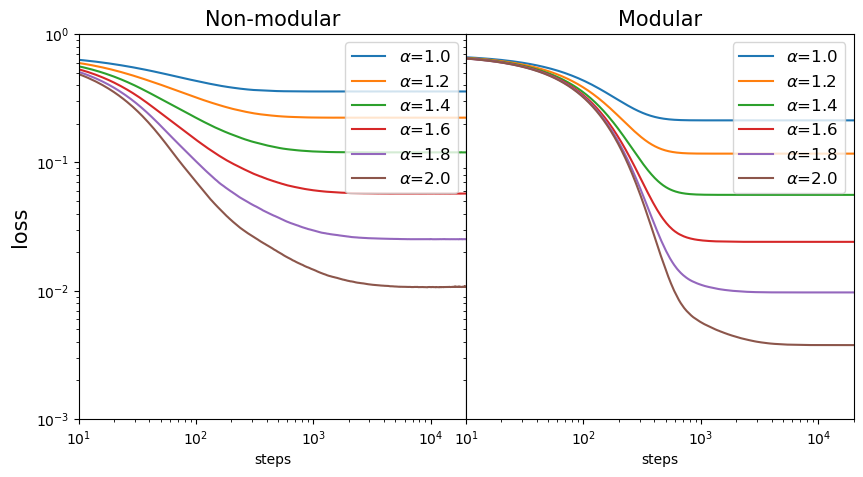

In [75]:
import numpy as np
import matplotlib.pyplot as plt

seeds = np.arange(4)
n_tasks = [1000]
alphas = [1.0,1.2,1.4,1.6,1.8,2.0]

seed = 0
n_task = 1000
alpha = 2.0
dim = 100

plt.figure(figsize=(10,5))

for j in range(2):

    # time evolution
    # single run
    plt.subplot(1,2,j+1)

    data_r = []

    for alpha in alphas:
        if j == 0:
            data = np.load(f'./results/nsl_signgd/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
        else:
            data = np.load(f'./results/nsl_ortho/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
        plt.plot(data['losses'])
        data_r.append(data['losses'])

    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel('steps')
    
    if j == 0:
        plt.ylabel('loss', fontsize=15)

    #plt.plot([80,80], [0.01,1], color='black', ls='--', alpha=0.5)
    #plt.plot([200,200], [0.01,1], color='black', ls='--', alpha=0.5)
    #plt.text(110,0.01,'fitting', fontsize=15, rotation=90)

    plt.xlim(10,20000)
    
    plt.ylim(0.005,1.0)
    if j == 1:
        plt.yticks([])
        
    
    if j == 0:
        plt.title('Non-modular',fontsize=15)
    if j == 1:
        plt.title('Modular',fontsize=15)
        plt.yticks([])

    plt.legend([r'$\alpha$='+str(alphas[i]) for i in range(6)], fontsize=12, loc='upper right')
    
    plt.ylim(1e-3,1)
    
plt.subplots_adjust(wspace=0, hspace=0.0)
plt.savefig('./plot/loss_scaling_modular_S.pdf', bbox_inches='tight')

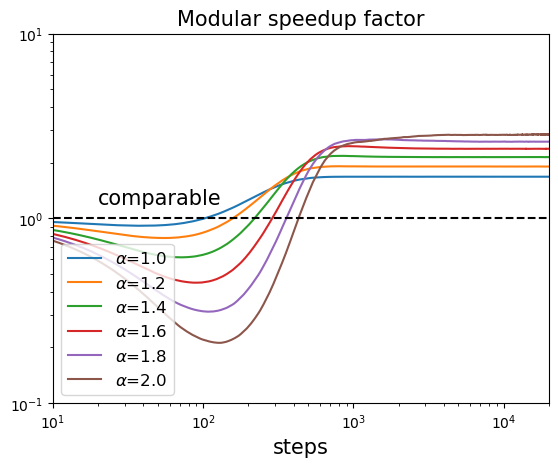

In [76]:
for alpha in alphas:
    data_norm = np.load(f'./results/nsl_signgd/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
    data_mod = np.load(f'./results/nsl_ortho/alpha_{alpha}_dim_{dim}_ntask_{n_task}_seed_{seed}.npz')
    plt.plot(data_norm['losses']/data_mod['losses'])

plt.xscale('log')
plt.yscale('log')

plt.xlabel('steps', fontsize=15)


plt.xlim(10,20000)

plt.ylim(0.005,1.0)



plt.legend([r'$\alpha$='+str(alphas[i]) for i in range(6)], fontsize=12, loc='lower left')

plt.ylim(1e-1,10)

plt.title('Modular speedup factor',fontsize=15)

#plt.ylabel('loss', fontsize=15)

plt.plot([10,20000], [1.0, 1.0], ls='--', color='black')
plt.text(20, 1.2, 'comparable', fontsize=15)

plt.subplots_adjust(wspace=0, hspace=0.0)
plt.savefig('./plot/modular_speedup_S.pdf', bbox_inches='tight')

In [520]:
start = 80
end = 200
alpha_S_adam = (np.log(data_adam[:,start]) - np.log(data_adam[:,end]))/(np.log(end)-np.log(start))
alpha_S_signgd = (np.log(data_signgd[:,start]) - np.log(data_signgd[:,end]))/(np.log(end)-np.log(start))
#plt.plot(alphas, alpha_S, marker='o')

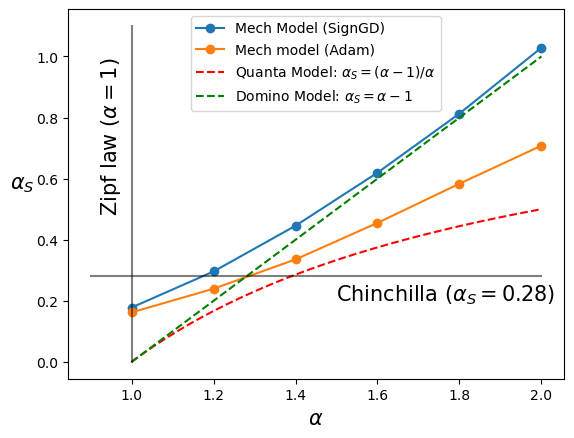

In [528]:
plt.plot(np.array(alphas)[1:], alpha_S_signgd[1:], marker='o')
plt.plot(np.array(alphas)[1:], alpha_S_adam[1:], marker='o')


xs = np.linspace(1,2,num=101)
plt.plot(xs,(xs-1)/xs, ls='--', color='red')
plt.plot(xs,xs-1, ls='--', color='green')

plt.legend(['Mech Model (SignGD)', 'Mech model (Adam)', r'Quanta Model: $\alpha_S=(\alpha-1)/\alpha$', r'Domino Model: $\alpha_S=\alpha-1$'], loc='upper center', fontsize=10)
plt.xlabel(r'$\alpha$',fontsize=15)
plt.ylabel(r'$\alpha_S$', rotation=0, labelpad=10,fontsize=15)

plt.plot([1,1],[0,1.1], color='black', alpha=0.5)
plt.plot([0.9,2],[0.28,0.28], color='black', alpha=0.5)

plt.text(1.5,0.2,r'Chinchilla $(\alpha_S=0.28)$', fontsize=15)
plt.text(0.92,0.5,r'Zipf law $(\alpha=1)$', fontsize=15, rotation=90)

plt.savefig('./plot/scale_exp_S.pdf', bbox_inches='tight')